In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
img= image.load_img("/content/drive/My Drive/Computer_Vision/basedata/Training/happy/pic12.png")

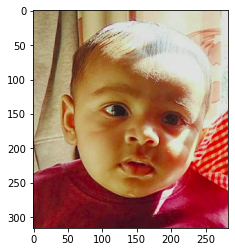

In [14]:
plt.imshow(img)

In [15]:
cv2.imread("/content/drive/My Drive/Computer_Vision/basedata/Training/happy/pic12.png")

array([[[105, 143, 161],
        [101, 139, 157],
        [103, 141, 159],
        ...,
        [223, 223, 223],
        [223, 223, 223],
        [223, 223, 223]],

       [[120, 158, 176],
        [115, 153, 171],
        [113, 151, 169],
        ...,
        [223, 223, 223],
        [223, 223, 223],
        [223, 223, 223]],

       [[123, 161, 179],
        [116, 154, 172],
        [116, 154, 172],
        ...,
        [223, 223, 223],
        [223, 223, 223],
        [223, 223, 223]],

       ...,

       [[ 28,  20, 102],
        [ 27,  20, 102],
        [ 22,  22, 101],
        ...,
        [157, 126, 219],
        [186, 155, 240],
        [177, 149, 226]],

       [[ 26,  20, 102],
        [ 26,  21, 103],
        [ 26,  27, 105],
        ...,
        [143, 109, 210],
        [166, 134, 225],
        [182, 152, 234]],

       [[ 25,  21, 102],
        [ 24,  22, 103],
        [ 27,  28, 108],
        ...,
        [116,  79, 190],
        [140, 108, 206],
        [164, 135, 223]]

In [16]:
cv2.imread("/content/drive/My Drive/Computer_Vision/basedata/Training/happy/pic12.png").shape

(316, 283, 3)

In [18]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [20]:
training_dataset=train.flow_from_directory('/content/drive/My Drive/Computer_Vision/basedata/Training/',target_size=(200,200),batch_size=3,class_mode='binary')
validation_dataset=train.flow_from_directory('/content/drive/My Drive/Computer_Vision/basedata/Validation/',target_size=(200,200),batch_size=3,class_mode='binary')


Found 40 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [21]:
training_dataset.class_indices

{'happy': 0, 'not happy': 1}

In [27]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),tf.keras.layers.MaxPool2D(2,2),
                                  #
                                  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),tf.keras.layers.MaxPool2D(2,2),
                                  ##
                                  tf.keras.layers.Flatten(),
                                  ##
                                  tf.keras.layers.Dense(512,activation='relu'),
                                  ##
                                  tf.keras.layers.Dense(1,activation='sigmoid'),
                                  ])

In [29]:
model.compile(loss='binary_crossentropy', optimizer= RMSprop(lr=0.001),metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [30]:
model_fit=model.fit(training_dataset,steps_per_epoch=3,epochs=10,validation_data=validation_dataset)

Epoch 1/10
3/3 [==============================] - 47s 7s/step - loss: 7.1837 - accuracy: 0.6667 - val_loss: 1.3302 - val_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 2s 756ms/step - loss: 1.2615 - accuracy: 0.3333 - val_loss: 1.1448 - val_accuracy: 0.5000
Epoch 3/10
3/3 [==============================] - 2s 733ms/step - loss: 1.9217 - accuracy: 0.4444 - val_loss: 0.6761 - val_accuracy: 0.5250
Epoch 4/10
3/3 [==============================] - 1s 314ms/step - loss: 1.1032 - accuracy: 0.2857 - val_loss: 0.6577 - val_accuracy: 0.5500
Epoch 5/10
3/3 [==============================] - 1s 626ms/step - loss: 0.6890 - accuracy: 0.4444 - val_loss: 0.6348 - val_accuracy: 0.7000
Epoch 6/10
3/3 [==============================] - 1s 338ms/step - loss: 0.7301 - accuracy: 0.5556 - val_loss: 0.7428 - val_accuracy: 0.5250
Epoch 7/10
3/3 [==============================] - 1s 459ms/step - loss: 0.8415 - accuracy: 0.6667 - val_loss: 0.6280 - val_accuracy: 0.8000
Epoch 8/10
3/3 [======

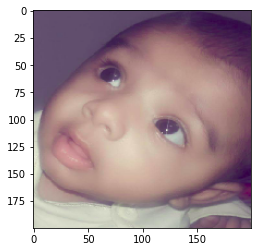

Baby,Afraj is sad


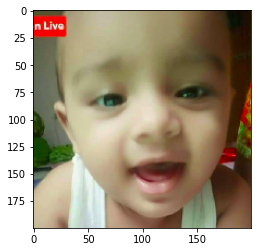

Baby,Afraj is happy


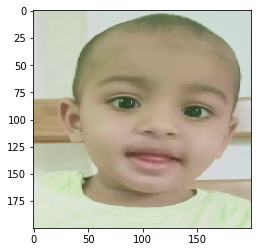

Baby,Afraj is sad


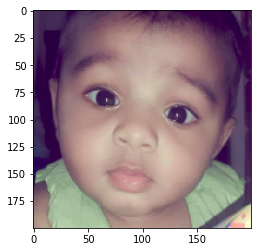

Baby,Afraj is sad


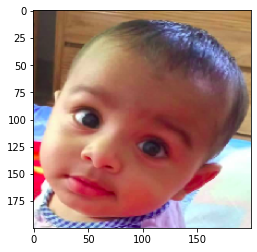

Baby,Afraj is happy


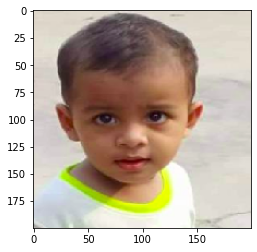

Baby,Afraj is happy


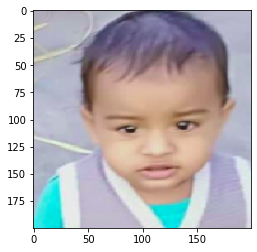

Baby,Afraj is sad


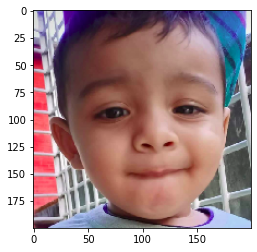

Baby,Afraj is sad


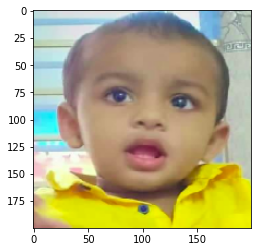

Baby,Afraj is happy


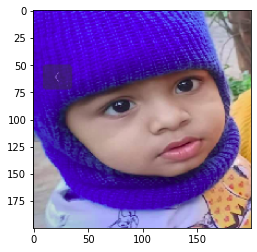

Baby,Afraj is happy


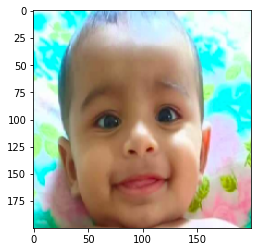

Baby,Afraj is happy


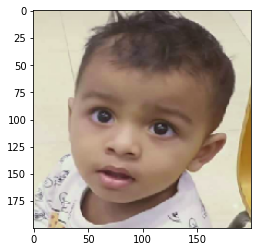

Baby,Afraj is sad


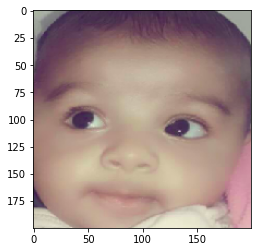

Baby,Afraj is sad


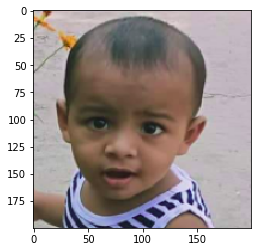

Baby,Afraj is sad


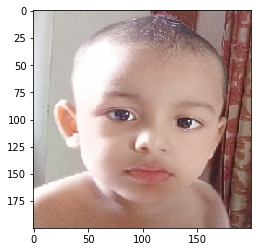

Baby,Afraj is sad


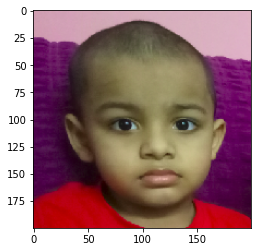

Baby,Afraj is sad


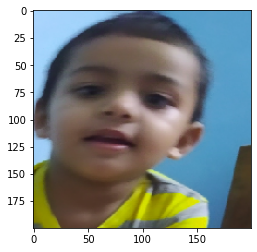

Baby,Afraj is sad


In [37]:
dir_path='/content/drive/My Drive/Computer_Vision/basedata/Testing'
for i in os.listdir(dir_path):
  img= image.load_img(dir_path + '//' + i,target_size=(200,200))
  plt.imshow(img)
  plt.show()

  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  val=model.predict(images)
  if val== 0:
    print("Baby,Afraj is happy")
  else:
    print("Baby,Afraj is sad")